In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import folium

In [2]:
# Load Excel file
file_path = "C:/Users/ecig/Documents/projects/ANIN/GW data/GW_data_depth.xlsx"
df = pd.read_excel(file_path)

In [3]:
column_names = df.keys()
df = df.set_index('Station')

In [4]:
labels = ['Shortname','Equipment']
df.drop(labels, axis=1, inplace = True)

In [5]:
df_metadata = df.iloc[:, :8]
df_data = df.iloc[:, 8:]
df_metadata['Startdate'] = pd.to_datetime(df['Startdate'], format='%Y%m%d')
df_metadata['Enddate'] = pd.to_datetime(df['Enddate'], format='%Y%m%d')

df_metadata['lenObs_months'] = df_metadata.Enddate.dt.to_period('M').view(dtype='int64') - df_metadata.Startdate.dt.to_period('M').view(dtype='int64')
df_metadata['lenObs_yr'] =round(df_metadata.lenObs_months/12)
df_metadata

,Latitude,Longitude,Elevation,Startdate,Enddate,Active,Status,Monitoring Frequency,lenObs_months,lenObs_yr
Station,,,,,,,,,,
A1N0001,-25.549722,25.927500,1421.0,1977-01-21,2011-09-27,False,Unused,QUARTER,416,35.0
A1N0002,-25.550278,25.915278,1419.0,1977-01-21,2011-09-27,False,Unused,QUARTER,416,35.0
A1N0003,-25.520583,25.919634,1454.0,1977-02-18,2000-06-30,False,Unused,NaN,280,23.0
A2N0001,-24.352778,27.048333,880.0,1960-06-15,2022-01-25,True,In use,Monthly,739,62.0
A2N0002,-24.716667,26.816667,1033.0,1960-05-20,2004-06-29,False,Unused,NaN,529,44.0
...,...,...,...,...,...,...,...,...,...,...
X3N0008,-24.740000,31.060000,575.0,2002-11-14,2020-03-15,True,In use,Monthly,208,17.0
X3N0009,-24.791389,31.014167,732.0,2002-11-14,2022-06-07,True,In use,QUARTER,235,20.0
X3N0010,-24.779990,31.091330,551.0,2002-11-14,2022-06-07,True,In use,Monthly,235,20.0


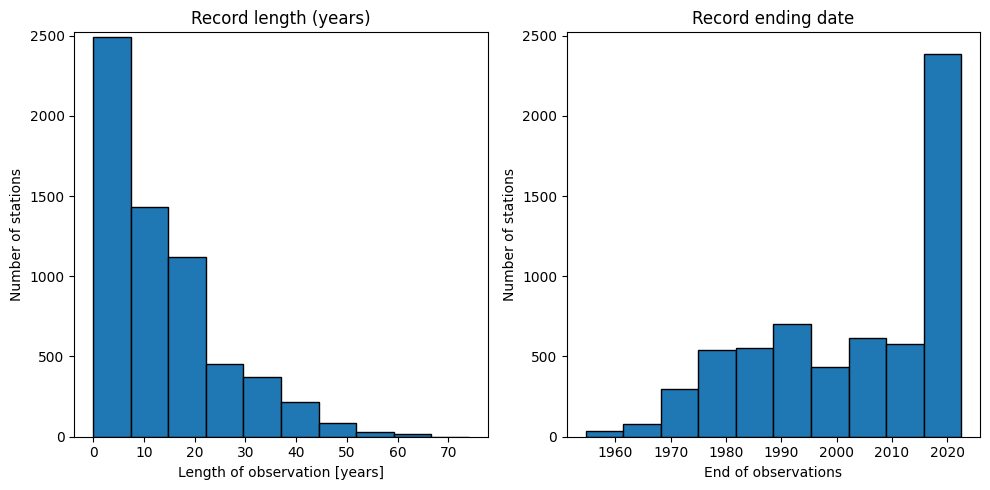

In [6]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Create a histogram of the "lenObs" values
axs[0].hist(df_metadata["lenObs_yr"], bins=10,edgecolor='black')
axs[0].set_xlabel("Length of observation [years]")
axs[0].set_ylabel("Number of stations")
axs[0].set_title("Record length (years)")
axs[0].set_ylim([0, 2520])  # set y-axis range

axs[1].hist(df_metadata["Enddate"], bins=10,edgecolor='black')
axs[1].set_xlabel("End date")
axs[1].set_xlabel("End of observations")
axs[1].set_ylabel("Number of stations")
axs[1].set_title("Record ending date")
axs[1].set_ylim([0, 2520])  # set y-axis range

# Adjust the layout and spacing of the subplots
fig.tight_layout()



# Save figure
 plt.savefig('GW_histograms_allStations.png')

#### Interactive map of Stations locations

In [7]:
 # Create a map centered at the mean coordinates of the data
 center_lat = df_metadata["Latitude"].mean()
 center_lon = df_metadata["Longitude"].mean()
 m = folium.Map(location=[center_lat, center_lon], zoom_start=6)

 # Add markers for each data point
 for index, row in df_metadata.iterrows():
     lat = row["Latitude"]
     lon = row["Longitude"]
     len_obs = row["lenObs_yr"]
     marker_text = f"lenObs_yr: {len_obs}"
     folium.Marker(location=[lat, lon], popup=marker_text).add_to(m)
 m

### Info from "operative" stations

In [8]:
# Select the data for which the ending date was in 2022
metadata_active= df_metadata[df_metadata['Active'] == True]

# Get the indices of the selected rows
selected_indices = metadata_active.index
nstations= len(metadata_active)
print(nstations)

1803


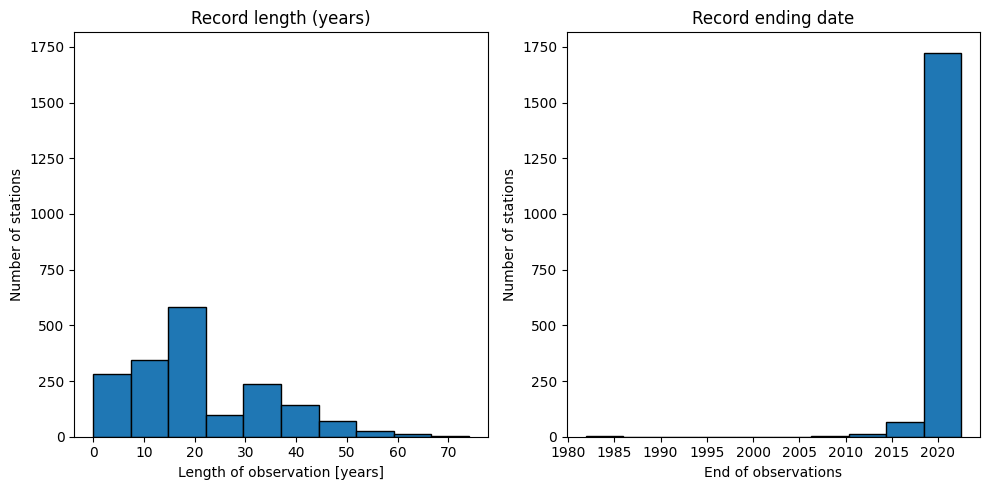

In [9]:
# Repeat histogram figure with "Operative Stations"
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Create a histogram of the "lenObs" values
axs[0].hist(metadata_active["lenObs_yr"], bins=10,edgecolor='black')
axs[0].set_xlabel("Length of observation [years]")
axs[0].set_ylabel("Number of stations")
axs[0].set_title("Record length (years)")
axs[0].set_ylim([0, 550])  # set y-axis range

axs[1].hist(metadata_active["Enddate"], bins=10,edgecolor='black')
axs[1].set_xlabel("End date")
axs[1].set_xlabel("End of observations")
axs[1].set_ylabel("Number of stations")
axs[1].set_title("Record ending date")
axs[1].set_ylim([0, 550])  # set y-axis range

# Adjust the layout and spacing of the subplots
fig.tight_layout()


# Save figure
plt.savefig('GW_histograms_active.png')

In [10]:
# Select active stations wiht record reaching until 2022
metadata_active22 = metadata_active[metadata_active['Enddate'].dt.year == 2022]

# Get the indices of the selected rows
selected_indices22 = metadata_active22.index


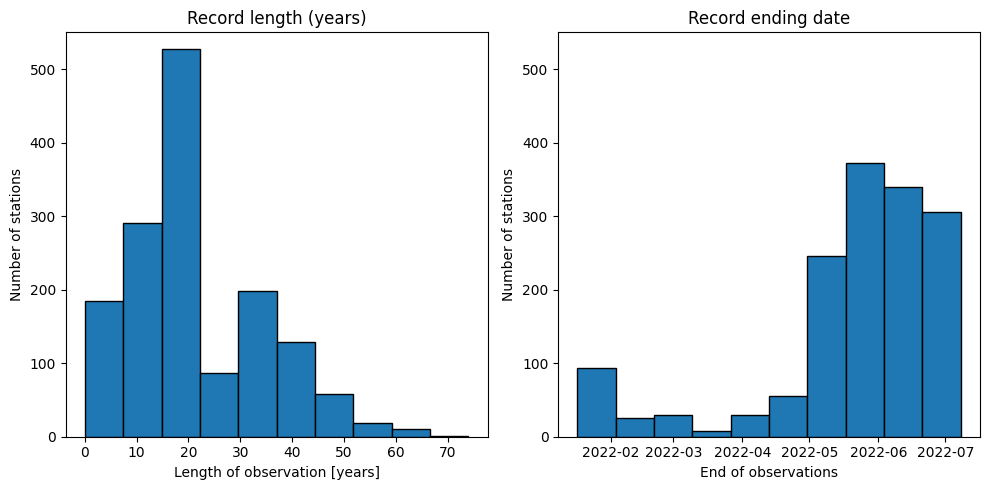

In [12]:
# Repeat histogram figure with "Operative Stations"
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Create a histogram of the "lenObs" values
axs[0].hist(metadata_active22["lenObs_yr"], bins=10,edgecolor='black')
axs[0].set_xlabel("Length of observation [years]")
axs[0].set_ylabel("Number of stations")
axs[0].set_title("Record length (years)")
axs[0].set_ylim([0, 550])  # set y-axis range

axs[1].hist(metadata_active22["Enddate"], bins=10,edgecolor='black')
axs[1].set_xlabel("End date")
axs[1].set_xlabel("End of observations")
axs[1].set_ylabel("Number of stations")
axs[1].set_title("Record ending date")
axs[1].set_ylim([0, 550])  # set y-axis range

# Adjust the layout and spacing of the subplots
fig.tight_layout()


# Save figure
plt.savefig('GW_histograms_active22.png')

#### Interactive map of Stations locations

In [13]:

# Create a map centered at the mean coordinates of the data
center_lat = metadata_active22["Latitude"].mean()
center_lon = metadata_active22["Longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Add markers for each data point
for index, row in metadata_active22.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    len_obs = row["lenObs_yr"]
    marker_text = f"lenObs_yr: {len_obs}"
    folium.Marker(location=[lat, lon], popup=marker_text).add_to(m)
m

#### Compute the percentage of missing values for each station

In [14]:
# Get the data of the previously selected stations

df_data_22 = df_data.loc[selected_indices22]
df_data_22 = df_data_22.T

In [15]:
# Compute the percentage of NaNs for the entire time series.

percentage_nans_dict = {}
for col in df_data_22.columns:
    num_nans = df_data_22[col].isna().sum()
    percent = num_nans / len(df_data_22) * 100
    percentage_nans_dict[col] = percent
    
# Create a pandas Series from the dictionary
percentage_nans = pd.Series(percentage_nans_dict)


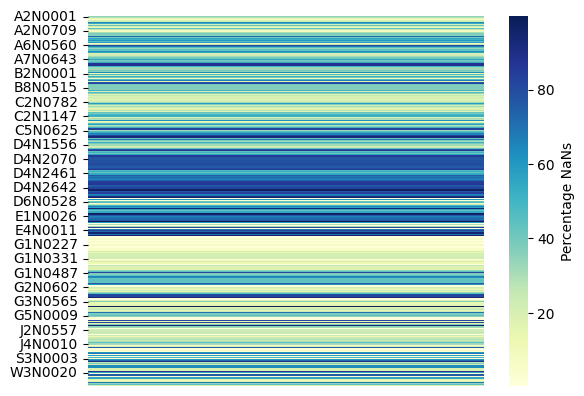

<Figure size 640x480 with 0 Axes>

In [16]:
# Plot the results in a heatmap

import seaborn as sns

# Create a heatmap of the percentage of NaNs in each row
sns.heatmap(pd.DataFrame(percentage_nans, columns=['Percentage NaNs']),cmap='YlGnBu', cbar_kws={'label': 'Percentage NaNs'}, xticklabels=False)
plt.show()

# Save figure
plt.savefig('Total_NaNpercent.png')

In [17]:
# Compute the annual percentage of NaNs for each station.

# Create a time vector for the time series
sdate = '1999-10-01'   # start date
edate = '2022-07-28'   # end date
start_date = pd.to_datetime(sdate)
end_date = pd.to_datetime(edate)
dates = pd.date_range(start_date,end_date, freq='MS')

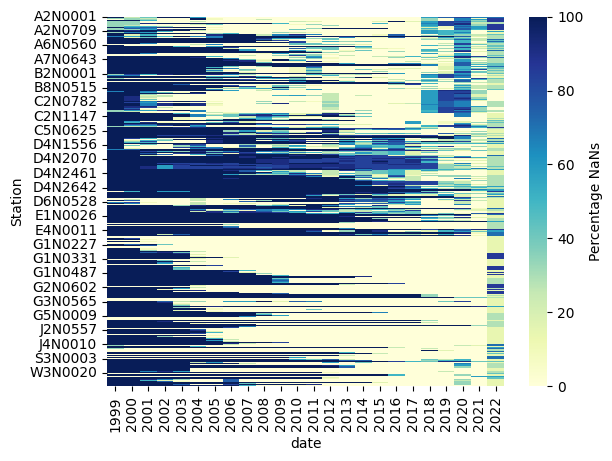

<Figure size 640x480 with 0 Axes>

In [18]:
# Compute annual percentage of missing values in a dataframe.

# Add date column to dataframe.
df_data_22['date']=dates 

# Group by year and compute annual percentage of missing values.
yearly_nan_percentages = df_data_22.groupby(df_data_22['date'].dt.year).apply(lambda x: x.isna().sum() / len(x) * 100) 


# Plot the results in a heatmap.
sns.heatmap(yearly_nan_percentages.T, cmap='YlGnBu', cbar_kws={'label': 'Percentage NaNs'}, xticklabels=True)
plt.show()

# Save figure
plt.savefig('Annual_NaNpercent.png')

In [19]:
# Export the selected stations as two separate files:
# (1) The metadata excel contains infromation about the stations. 
# (2) The data excel contains the timseries data for the selected stations.

df_data_22.to_excel('stations_data22_active.xlsx')
metadata_active22.to_excel('stations_metadadata22_active.xlsx')